In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
''' 1. Create a set of 250 million entries, where 88% of them are "support"
# and 12% are "not".
pop size <- 250000000
possible entries <- c(rep("support", 0.88 * pop size), rep("not", 0.12 * pop size))
# 2. Sample 1000 entries without replacement.
sampled entries <- sample(possible entries, size = 1000)
# 3. Compute p-hat: count the number that are "support", then divide by
# the sample size.
sum(sampled entries == "support") / 1000
'''


# Define the total number of entries
total_entries = 250_000_000

# Calculate the probabilities for "support" and "not"
probabilities = [0.88, 0.12]

# Define the possible entries
entries = ["support", "not"]

# Generate the dataset with the specified probabilities
generated_entries = np.random.choice(entries, size=total_entries, p=probabilities)

# Verify the counts of each entry type
count_support = np.sum(generated_entries == 'support')
count_not = np.sum(generated_entries == 'not')

print(f"Total entries: {len(generated_entries)}")
print(f"Count of 'support': {count_support}")
print(f"Count of 'not': {count_not}")


Total entries: 250000000
Count of 'support': 219999379
Count of 'not': 30000621


In [14]:
p=count_support/total_entries
p

0.880024584

In [23]:
# Sample 1000 entries without replacement
sampled_entries = np.random.choice(generated_entries, size=1000, replace=True)
# p_hat
p_hat= np.sum(sampled_entries == 'support')/1000
p_hat

0.874

In [ ]:
# Number of simulations
num_simulations = 100

# List to store p_hat values
p_hat_values = []

# Run simulations
for _ in range(num_simulations):
    # Sample 1000 entries without replacement
    sample = np.random.choice(generated_entries, size=100, replace=False)
    
    # Calculate p_hat (proportion of 'support' in the sample)
    p_hat = np.mean(sample == 'support')
    
    # Store the p_hat value
    p_hat_values.append(p_hat)

# Convert p_hat_values to a numpy array for easier manipulation
p_hat_values = np.array(p_hat_values)

# Plot histogram of p_hat values
plt.hist(p_hat_values, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of p_hat Values')
plt.xlabel('p_hat')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_hat_values

In [26]:
((0.25*0.75)/10)**(1/2)


0.13693063937629152

In [27]:
((0.887*(1-0.887))/1000)**(1/2)

0.010011543337567888

In [ ]:
#1. use point of obervation and significent level to calculate interval

In [33]:
import math
from scipy.stats import norm

def calculate_se(p_hat, n):
    # Ensure that n is not zero to avoid division by zero
    if n == 0:
        raise ValueError("Sample size n must be greater than 0")
    
    se = math.sqrt((p_hat * (1 - p_hat)) / n)
    return se

# Example usage
p_hat = 0.82  # Sample proportion
n = 1042      # Sample size

se = calculate_se(p_hat, n)
print(f"The standard error (SE) is: {se}")

The standard error (SE) is: 0.011901708775845125


In [37]:
def calculate_interval(p_hat,z_score, se):    
    intervalP = p_hat+z_score*se
    intervalN = p_hat-z_score*se
    return intervalP, intervalN

confidence=0.95
#The norm.ppf function from scipy.stats computes the percent point function (inverse of the cumulative distribution function) for a given probability.
z_score = norm.ppf(0.5+ confidence / 2)

interval=calculate_interval(p_hat,z_score, se)
interval

(0.8433269205551407, 0.7966730794448592)

In [35]:
print(f"The z-score for a {confidence*100}% confidence level is: {z_score}")

The z-score for a 95.0% confidence level is: 1.959963984540054


In [38]:
# Example usage
p_hat = 0.848  # Sample proportion
n = 1000      # Sample size
confidence=0.99
z_score = norm.ppf(0.5+ confidence / 2)
se = calculate_se(p_hat, n)
interval=calculate_interval(p_hat,z_score, se)
interval

(0.877244001646239, 0.818755998353761)

In [43]:
#H0=0.33
#HA~=0.33
#sample_proportion_point_of_estimate = 0.24
# Example usage
p_hat = 0.24  # point of estimate
n=50     # Sample size
confidence=0.95
z_score = norm.ppf(0.5+ confidence / 2)
se = calculate_se(p_hat, n)
interval=calculate_interval(p_hat,z_score, se)
interval

(0.35837922865896776, 0.12162077134103225)

In [46]:
'''GUIDED PRACTICE 5.23
This time we took a larger sample of 228 college-educated adults, 34 (14.9%) selected the correct
answer to the question in Guided Practice.
Compute a 95% confidence interval for the fraction of college-educated adults who answered the
children-in-2100 question correctly, and evaluate the hypotheses in Guided Practice.'''
#H0=0.33
#HA~=0.33
#sample_proportion_point_of_estimate = 0.149
# Example usage
p_hat = 0.149  # point of estimate
n=228     # Sample size
confidence=0.999
z_score = norm.ppf(0.5+ confidence / 2)
se = calculate_se(p_hat, n)
interval=calculate_interval(p_hat,z_score, se)
interval

(0.22659896236402388, 0.07140103763597609)

In [ ]:
#2.COMPARE THE P-VALUE TO α TO EVALUATE H0

In [57]:
'''
 simple random sample of 1028 US adults in March 2013 show that 56% support nuclear arms
reduction. Does this provide convincing evidence that a majority of Americans supported nuclear
arms reduction at the 5% significance level?
'''

#H0=50%
#Ha>50%

p_hat = 0.5  # population mean
x=0.56
n=1028     # Sample size
alpha=0.05
se = calculate_se(p_hat, n)
z_score =( x-p_hat)/se
#calculate the p-value by using the cumulative distribution function (norm.cdf).
p_value =2* (1 - stats.norm.cdf(z_score))
z_score,se,p_value


(3.847492690051539, 0.015594571538795133, 0.0001193328366213553)

In [64]:
'''
 simple random sample of 826 payday loan borrowers was surveyed to better understand their
interests around regulation and costs. 70% of the responses supported new regulations on payday
lenders.

Estimate the standard error of ˆp = 0.70. Because p is unknown and the standard error is for a
confidence interval, use ˆp in place of p in the formula.1

Construct a 95% confidence interval for p, the proportion of payday borrowers who support increased
regulation for payday lenders.
'''

p_hat = 0.7  # sample mean

n=826     # Sample size

se = calculate_se(p_hat, n)
confidence=0.95
#The norm.ppf function from scipy.stats computes the percent point function (inverse of the cumulative distribution function) for a given probability.
z_score = norm.ppf(0.5+ confidence / 2)
interval=calculate_interval(p_hat,z_score, se)
interval,se, z_score

((0.7312512731429909, 0.668748726857009),
 0.015944820103582016,
 1.959963984540054)

In [67]:
'''Do payday loan borrowers support a regulation that would require lenders to pull their credit report
and evaluate their debt payments? From a random sample of 826 borrowers, 51% said they would
support such a regulation.  
evaluate whether the poll provides
convincing evidence that a majority of payday loan borrowers support a new regulation that would
require lenders to pull credit reports and evaluate debt payments.
'''


#H0=50%
#Ha>50%
p_hat = 0.5  # p0 mean
x=0.51
n=826     # Sample size
alpha=0.05
se = calculate_se(p_hat, n)
z_score =( x-p_hat)/se
p_value =2* (1 - stats.norm.cdf(z_score))
se, z_score,p_value


(0.017397225015980525, 0.5748043145279971, 0.5654236484645514)

In [70]:
'''A manager is about to oversee the mass production of a new tire model in her factory, and she would
like to estimate what proportion of these tires will be rejected through quality control. The quality
control team has monitored the last three tire models produced by the factory, failing 1.7% of tires
in the first model, 6.2% of the second model, and 1.3% of the third model. The manager would like
to examine enough tires to estimate the failure rate of the new tire model to within about 1% with
a 90% confidence level. There are three different failure rates to choose from. Perform the sample
size computation for each separately, and identify three sample sizes to consider
'''
p_hat = 0.013  # population mean
margin=0.01
confidence=0.9
#The norm.ppf function from scipy.stats computes the percent point function (inverse of the cumulative distribution function) for a given probability.
z_score = norm.ppf(0.5+ confidence / 2)
se=margin/z_score
#se**2=(p_hat*(1-p_hat))/n
n=(p_hat*(1-p_hat))/se**2

z_score,se, n


(1.6448536269514722, 0.006079568319117692, 347.14828059498234)

In [73]:
'''
we decide a wider margin of error of 5% for each individual survey would be acceptable. Based on
the original sample of borrowers where 70% supported some form of regulation, how big should our
monthly sample be for a margin of error of 0.05 with 95% confidence
'''
p_hat = 0.7  # population mean
margin=0.05
confidence=0.95
#The norm.ppf function from scipy.stats computes the percent point function (inverse of the cumulative distribution function) for a given probability.
z_score = norm.ppf(0.5+ confidence / 2)
se=margin/z_score
#se**2=(p_hat*(1-p_hat))/n
n=(p_hat*(1-p_hat))/se**2

z_score,se, n

(1.959963984540054, 0.0255106728462327, 322.6825409383065)

In [76]:
'''
A 5-year experiment was conducted to evaluate the effectiveness of fish oils on reducing cardiovascular
events, where each subject was randomized into one of two treatment groups. We’ll consider heart
attack outcomes in these patients:
heart attack no event Total
fish oil 145 12788 12933
placebo 200 12738 12938
Create a 95% confidence interval for the effect of fish oils on heart attacks for patients who are
well-represented by those in the study. Also interpret the interval in the context of the study.
'''
p_f=145/12933
p_p=200/12938

p_hat = p_f-p_p  # sample mean

n_f=12933     # Sample size
n_p=12938

var = (p_f*(1-p_f))/n_f  + (p_p*(1-p_p))/n_p
se = var**(1/2)

confidence=0.95
#The norm.ppf function from scipy.stats computes the percent point function (inverse of the cumulative distribution function) for a given probability.
z_score = norm.ppf(0.5+ confidence / 2)

interval=calculate_interval(p_hat,z_score, se)
p_hat,interval,se, z_score


(-0.004246710608608092,
 (-0.0014517763930541822, -0.007041644824162001),
 0.0014260130479947562,
 1.959963984540054)

In [77]:
'''
Race White Black Hispanic Other Total
Representation in juries 205 26 25 19 275
Registered voters 0.72 0.07 0.12 0.09 1.00
Twelve percent of the population is Hispanic and 9% represent other races. How many of the 275
jurors would we expect to be Hispanic or from another race?
'''
popu=275
0.12*popu,0.09*popu

(33.0, 24.75)

In [78]:
'''
shows the upper tail of a chi-square distribution with 2 degrees of freedom. The bound
for this upper tail is at 4.3. Find the tail area.
'''
import scipy.stats as stats

# Parameters
df = 2  # degrees of freedom
bound = 4.3

# Calculate the upper tail area
'''
In the context of statistical functions provided by libraries like scipy.stats, sf stands for "survival function." The survival function is the complement of the cumulative distribution function (CDF) and represents the probability that a random variable exceeds a certain value. Mathematically, it can be expressed as:

[ \text{SF}(x) = 1 - \text{CDF}(x) ]

So, when you use stats.chi2.sf(x, df), it computes the probability that a chi-square random variable with df degrees of freedom is greater than x. This is particularly useful for finding p-values in hypothesis testing.

Here's a brief summary of key functions:

PDF (Probability Density Function): Describes the likelihood of a random variable taking on a specific value.
CDF (Cumulative Distribution Function): Represents the probability that a random variable takes on a value less than or equal to a specific value.
SF (Survival Function): Represents the probability that a random variable takes on a value greater than a specific value. It is computed as (1 - \text{CDF}(x)).
In practice, using the survival function is often convenient for calculating upper tail probabilities directly.
'''
tail_area = stats.chi2.sf(bound, df)

print(f"The tail area for a chi-square distribution with {df} degrees of freedom and a bound at {bound} is {tail_area:.4f}")


The tail area for a chi-square distribution with 2 degrees of freedom and a bound at 4.3 is 0.1165


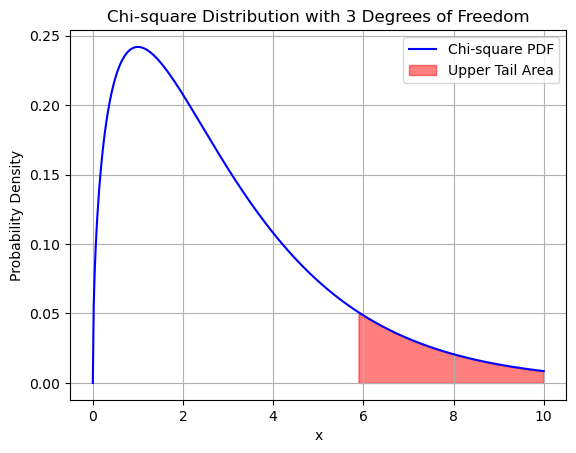

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
df = 3  # degrees of freedom
bound =  5.89

# Generate x values
x = np.linspace(0, 10, 500)

# Calculate the chi-square PDF (Probability density function )  values
pdf_values = stats.chi2.pdf(x, df)

# Plot the chi-square distribution
plt.plot(x, pdf_values, label='Chi-square PDF', color='blue')

# Shade the upper tail area
x_fill = x[x >= bound]
y_fill = stats.chi2.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Upper Tail Area')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Chi-square Distribution with {df} Degrees of Freedom')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [87]:
# Calculate the upper tail area
tail_area = stats.chi2.sf(bound, df)

print(f"The tail area for a chi-square distribution with {df} degrees of freedom and a bound at {bound} is {tail_area:.4f}")

The tail area for a chi-square distribution with 3 degrees of freedom and a bound at 5.89 is 0.1171


In [93]:
'''
 evaluating whether a certain statistical model fits a data set. Daily stock returns from the S&P500 for 10 can
 be used to assess whether stock activity each day is independent of the stock’s behavior on previous
days.  a chi-square test can be used to study
the problem. We will label each day as Up or Down (D) depending on whether the market was up
or down that day. For example, consider the following changes in price, their new labels of up and
down, and then the number of days that must be observed before each Up day
If the days really are independent, then the number of days until a positive trading day should follow
a geometric distribution. The geometric distribution describes the probability of waiting for the k
th
trial to observe the first success. Here each up day (Up) represents a success, and down (D) days
represent failures. In the data above, it took only one day until the market was up, so the first wait
time was 1 day. It took two more days before we observed our next Up trading day, and two more
for the third Up day. We would like to determine if these counts (1, 2, 2, 1, 4, and so on) follow
the geometric distribution. Figure 6.10 shows the number of waiting days for a positive trading day
during 10 years for the S&P500.
Days 1 2 3 4 5 6 7+ Tota
Days 1 2 3 4 5 6 7+ Total
Observed 717 369 155 69 28 14 10 1362
Geometric Model 743 338 154 70 32 14 12 1362

The S&P500 was positive on 54.5% of those days.

 Distribution of the waiting time until a positive trading day. The
expected counts based on the geometric model are shown in the last row. To
find each expected count, we identify the probability of waiting D days based on
the geometric model (P(D) = (1 − 0.545)D−1
(0.545)) and multiply by the total
number of streaks, 1362. For example, waiting for three days occurs under the
geometric model about 0.4552 × 0.545 = 11.28% of the time, which corresponds to
0.1128 × 1362 = 154 streaks.

'''
t=[717, 369, 155, 69,28, 14, 10]
a=[743, 338, 154, 70, 32, 14, 12,]
X=[]
for i in range(len(t)):
    x=(t[i]-a[i])**2/a[i]
    X.append(x)


tail_area = stats.chi2.sf(sum(X), 6)
    
X,sum(X),tail_area

([0.9098250336473755,
  2.8431952662721893,
  0.006493506493506494,
  0.014285714285714285,
  0.5,
  0.0,
  0.3333333333333333],
 4.607132854032119,
 0.5950932849625075)

In [94]:
'''
Figure 6.17 summarizes the results of an experiment evaluating three treatments for Type 2 Diabetes
in patients aged 10-17 who were being treated with metformin. The three treatments considered
were continued treatment with metformin (met), treatment with metformin combined with rosiglitazone (rosi), or a lifestyle intervention program. Each patient had a primary outcome, which was
either lacked glycemic control (failure) or did not lack that control (success). What are appropriate
hypotheses for this test?
H0: There is no difference in the effectiveness of the three treatments.
HA: There is some difference in effectiveness between the three treatments, e.g. perhaps the rosi
treatment performed better than lifestyle.
Failure Success Total
lifestyle 109 125 234
met 120 112 232
rosi 90 143 233
Total 319 380 699
'''
import numpy as np

# Given data
observed = np.array([
    [109, 125],
    [120, 112],
    [90, 143]
])

# Totals
row_totals = np.array([234, 232, 233])
column_totals = np.array([319, 380])
grand_total = 699

# Calculate expected values
expected = np.outer(row_totals, column_totals) / grand_total

print("Expected Values:")
print(expected)



Expected Values:
[[106.78969957 127.21030043]
 [105.8769671  126.1230329 ]
 [106.33333333 126.66666667]]


In [104]:
E=(observed-expected)**2/expected
tail_area = stats.chi2.sf(np.sum(E), 2)
E,np.sum(E),tail_area


(array([[0.04574812, 0.03840434],
        [1.88388527, 1.58147211],
        [2.50888192, 2.10614035]]),
 8.164532108794889,
 0.0168691957929816)

In [82]:
help(stats.chi2.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.chi2_gen instance
    Probability density function at x of the given RV.

    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)

    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



In [81]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.

    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].

    The endpoint of the interval can optionally be excluded.

    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.

    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``

    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is exc

In [48]:
#reference

In [19]:
np.random.choice(5, size=3,replace=False)

array([2, 1, 4])

In [15]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)

    Generates a random sample from a given 1-D array

    .. versionadded:: 1.7.0

    .. note::
        New code should use the `~numpy.random.Generator.choice`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``